In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install imbalanced-learn

In [2]:
df=pd.read_csv("heart_attack_prediction_dataset.csv")
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [3]:
df1=df #We apply one hot encoding for diet and gender features.
onehot=pd.get_dummies(df1.Sex,prefix ='Sex')
onehot2=pd.get_dummies(df1.Diet,prefix ='Diet')

In [4]:
onehot=onehot.join(onehot2)
df1=df1.join(onehot)
df1

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6,Argentina,South America,Southern Hemisphere,0,False,True,True,False,False
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,7,Canada,North America,Northern Hemisphere,0,False,True,False,False,True
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,4,France,Europe,Northern Hemisphere,0,True,False,False,True,False
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,4,Canada,North America,Northern Hemisphere,0,False,True,True,False,False
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,5,Thailand,Asia,Northern Hemisphere,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,7,Thailand,Asia,Northern Hemisphere,0,False,True,False,True,False
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,9,Canada,North America,Northern Hemisphere,0,True,False,False,True,False
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,4,Brazil,South America,Southern Hemisphere,1,False,True,True,False,False
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,8,Brazil,South America,Southern Hemisphere,0,False,True,False,False,True


In [5]:
columns_to_drop = ['Country','Hemisphere','Continent','Patient ID','Sex','Diet']
df1 = df1.drop(columns_to_drop,axis=1)
df1

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,False,True,True,False,False
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,0,False,True,False,False,True
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,0,True,False,False,True,False
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,0,False,True,True,False,False
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,94/76,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,0,False,True,False,True,False
8759,28,120,157/102,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,0,True,False,False,True,False
8760,47,250,161/75,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,1,False,True,True,False,False
8761,36,178,119/67,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,0,False,True,False,False,True


In [6]:
#Blood pressure feature decomposition.(do not run this code cell because of overlapping)
NewBP = df1[['High Blood Pressure', 'Low Blood Pressure']] = df1['Blood Pressure'].str.split('/', expand=True)
NewBP=NewBP.rename(columns={0:'High Blood Pressure',1:'Low Blood Pressure'})
df1.drop('Blood Pressure',axis=1,inplace=True)

In [7]:
X = df1[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'High Blood Pressure', 'Low Blood Pressure','Sex_Female',
         'Sex_Male','Diet_Average','Diet_Healthy','Diet_Unhealthy']]

y=df1['Heart Attack Risk'].values

In [8]:
#We convert boolean and string values to integer
cat_columns = ['Sex_Female','Sex_Male','Diet_Average','Diet_Healthy','Diet_Unhealthy','High Blood Pressure','Low Blood Pressure'] 
X[cat_columns] = np.int64 (df1[cat_columns].astype(int))

C:\Users\tunay\AppData\Local\Temp\ipykernel_4408\3086370677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_columns] = np.int64 (df1[cat_columns].astype(int))


In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [10]:
#Recursive Feature Elemination
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, step = 15)
fit = rfe.fit(X,y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 12
Selected Features: [ True  True  True False False False False  True  True False False  True
  True False  True False  True  True  True  True False False False False
 False]
Feature Ranking: [1 1 1 2 2 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2]


In [11]:
for feature in fit.support_.nonzero():
    print(X.columns[feature])
    rfe_features = X.columns[feature]

Index(['Age', 'Cholesterol', 'Heart Rate', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day',
       'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'High Blood Pressure', 'Low Blood Pressure'],
      dtype='object')


In [12]:
Rfe_data = pd.DataFrame(X,columns = rfe_features)
Rfe_data

,Age,Cholesterol,Heart Rate,Alcohol Consumption,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,BMI,Physical Activity Days Per Week,Sleep Hours Per Day,High Blood Pressure,Low Blood Pressure
0,67,208,72,0,4.168189,9,6.615001,31.251233,0,6,158,88
1,21,389,98,1,1.813242,1,4.963459,27.194973,1,7,165,93
2,21,324,72,0,2.078353,9,9.463426,28.176571,4,4,174,99
3,84,383,73,1,9.828130,9,7.648981,36.464704,3,4,163,100
4,66,318,93,0,5.804299,6,1.514821,21.809144,1,5,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,7.917342,8,10.806373,19.655895,7,7,94,76
8759,28,120,73,0,16.558426,8,3.833038,23.993866,4,9,157,102
8760,47,250,105,1,3.148438,5,2.375214,35.406146,4,4,161,75
8761,36,178,60,0,3.789950,5,0.029104,27.294020,2,8,119,67


In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

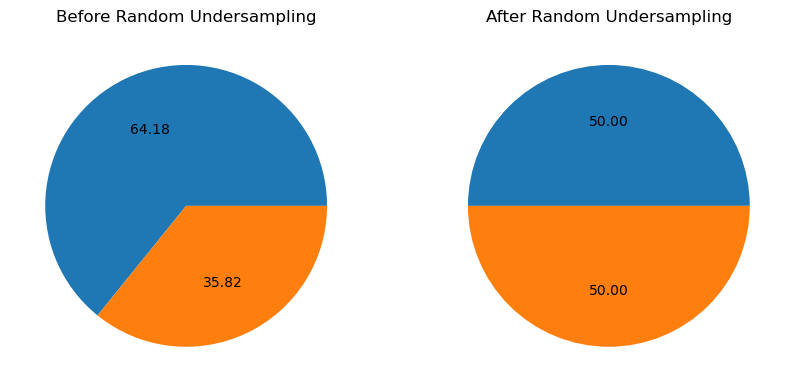

In [14]:
#Assuming you have your feature matrix X and target variable y defined
#Instantiate the RandomOverSampler
rus = RandomOverSampler(sampling_strategy="not majority")  # or you can use a specific float value
y1=y 
y2=y
#Perform random oversampling
Rfe_resampled, Rfe_y_resampled = rus.fit_resample(Rfe_data, y1)

#Plot the class distribution before and after oversampling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Before oversampling
axes[0].pie(pd.Series(y).value_counts(), autopct='%.2f')
axes[0].set_title("Before Random Undersampling")

#After oversampling
axes[1].pie(pd.Series(Rfe_y_resampled).value_counts(), autopct='%.2f')
axes[1].set_title("After Random Undersampling")

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rfe_resampled, Rfe_y_resampled, test_size = 0.20, random_state = 0) 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Print the best cross-validated score found by GridSearchCV
print("Best Cross-Validated Score: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}".format(test_accuracy))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Score: 0.73
Test Set Accuracy: 0.79
